# Working MNIST , CIFAR-10 dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [3]:
x_train = x_train/255.0
x_test = x_test/255.0

# Performing normalization

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding="valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
model.add(tf.keras.layers.Flatten(name="Input"))
model.add(tf.keras.layers.Dense(100,activation="relu", name="HiddenLayer1"))
model.add(tf.keras.layers.Dense(10,activation="softmax", name="Output"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 Input (Flatten)             (None, 5408)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               540900    
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [6]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
cnn1 = model.fit(x_train,y_train,batch_size=20,epochs=10, validation_split=0.2)

Epoch 1/10
2400/2400 [==============================] - 18s 3ms/step - loss: 0.1625 - accuracy: 0.9515 - val_loss: 0.0727 - val_accuracy: 0.9787
Epoch 2/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.0556 - accuracy: 0.9831 - val_loss: 0.0575 - val_accuracy: 0.9830
Epoch 3/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0351 - accuracy: 0.9893 - val_loss: 0.0589 - val_accuracy: 0.9833
Epoch 4/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 0.0628 - val_accuracy: 0.9826
Epoch 5/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0558 - val_accuracy: 0.9848
Epoch 6/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.0605 - val_accuracy: 0.9856
Epoch 7/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.0722 - val_accuracy

Training Accuracy - 99.8%

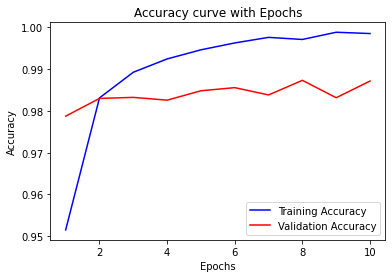

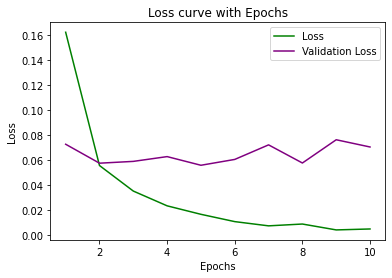

In [9]:
# Plotting and Visualising

cnn1acc = cnn1.history["accuracy"]
cnn1val_acc = cnn1.history["val_accuracy"]
cnn1lss = cnn1.history["loss"]
cnn1val_lss = cnn1.history["val_loss"]
epochs_list = [1,2,3,4,5,6,7,8,9,10]

#Accuracy Plot
plt.plot(epochs_list, cnn1acc, 'blue', label='Training Accuracy')
plt.plot(epochs_list, cnn1val_acc, 'red', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy curve with Epochs')

plt.legend()
plt.show()

#Loss Plot
plt.plot(epochs_list, cnn1lss, 'green', label="Loss")
plt.plot(epochs_list, cnn1val_lss, 'purple', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve with Epochs')

plt.legend()
plt.show()

In [10]:
modeleval = model.evaluate(x_test,y_test)
modeleval

313/313 [==============================] - 1s 3ms/step - loss: 0.0605 - accuracy: 0.9851


[0.06054028496146202, 0.9850999712944031]

Test Accuracy - 98.51%

In [11]:
y_pred= model.predict(x_test)
y_pred

array([[1.9013476e-15, 2.5702292e-14, 2.2118897e-13, ..., 1.0000000e+00,
        5.2209701e-15, 5.8828333e-13],
       [5.1369933e-13, 5.3159827e-10, 1.0000000e+00, ..., 2.1663474e-19,
        7.1455059e-16, 9.1620116e-21],
       [1.7137559e-08, 9.9999893e-01, 1.2367900e-08, ..., 1.6648312e-07,
        1.0096548e-07, 6.5716932e-11],
       ...,
       [1.9607253e-20, 7.2672288e-16, 1.3631878e-15, ..., 4.8448962e-13,
        7.1890230e-11, 5.9948674e-10],
       [3.2572551e-16, 7.6385864e-19, 2.5973267e-23, ..., 7.8634897e-20,
        2.4104027e-10, 2.9677013e-15],
       [4.7886567e-15, 2.0331221e-21, 1.3133317e-16, ..., 6.6082338e-24,
        1.2301190e-16, 8.0755519e-21]], dtype=float32)

What is Lenet-5 Architecture?

**First Layer: Convolutional Layer (CONV1):**

Parameters: Input (N) = 28, Padding (P) = 2, Filter (F) = 5 x 5, Stride (S) = 1
Conv Operation: ((N + 2P - F) / S) + 1 = ((28 + 4 - 5) / 1) + 1 = 28 x 28
We will apply 6 filters / kernels so we will get a 28 x 28 x 6 dimensional output

**Second Layer: Average Pooling Layer (POOL1):**

Parameters: Input (N) = 28, Filter (F) = 2 x 2, Stride (S) = 2
AVG Pooling Operation: ((N + 2P -F) / S) + 1 = ((28 - 2) / 2) + 1 = 14 x 14
We will have a 14 x 14 x 6 dimensional output at the end of this pooling

**Third Layer: Convolutional Layer (CONV2):**

Parameters: Input (N) = 14, Filter (F) = 5 x 5, Stride (S) = 1
Conv Operation: ((N + 2P - F) / S) + 1 = ((14 - 5) / 1) + 1 = 10 x 10
We will apply 16 filters / kernels so we will get a 10 x 10 x 16 dimensional output

**Fourth Layer: Average Pooling Layer (POOL2):**

Parameters: Input (N) = 10, Filter (F) = 2 x 2, Stride (S) = 2
AVG Pooling Operation: ((N + 2P -F) / S) + 1 = ((10 - 2) / 2) + 1 = 5 x 5
We will have a 5 x 5 x 16 dimensional output at the end of this pooling

**Fifth Layer: Fully Connected layer(FC1):**

Parameters: W: 400 * 120, b: 120
We will have an output of 120 x 1 dimension

**Sixth Layer: Fully Connected layer(FC2):**

Parameters: W: 120 * 84, b: 84
We will have an output of 84 x 1 dimension

**Seventh Layer: Output layer(Softmax):**

Parameters: W: 84 * 10, b: 10
We will get an output of 10 x 1 dimension

In [12]:
lenet5 = tf.keras.Sequential()
lenet5.add(tf.keras.Input(shape=(28,28,1)))
lenet5.add(tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', padding="same", name="ConvolutionalLayer1"))
lenet5.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, name="AveragePooling1"))
lenet5.add(tf.keras.layers.Conv2D(16,kernel_size=(5, 5), activation='tanh', name="ConvolutionalLayer2"))
lenet5.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, name="AveragePooling2"))
lenet5.add(tf.keras.layers.Flatten(name="Input"))
lenet5.add(tf.keras.layers.Dense(units=120, activation='tanh', name="HiddenLayer1"))
lenet5.add(tf.keras.layers.Dense(units=84, activation='tanh', name="HiddenLayer2"))
lenet5.add(tf.keras.layers.Dense(units=10, activation = 'softmax', name="Output"))
lenet5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionalLayer1 (Conv2D  (None, 28, 28, 6)        156       
 )                                                               
                                                                 
 AveragePooling1 (AveragePoo  (None, 14, 14, 6)        0         
 ling2D)                                                         
                                                                 
 ConvolutionalLayer2 (Conv2D  (None, 10, 10, 16)       2416      
 )                                                               
                                                                 
 AveragePooling2 (AveragePoo  (None, 5, 5, 16)         0         
 ling2D)                                                         
                                                                 
 Input (Flatten)             (None, 400)              

In [14]:
lenet5.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
a = lenet5.fit(x_train,y_train,batch_size=25,epochs=10, validation_split=0.2)

Epoch 1/10
1920/1920 [==============================] - 7s 3ms/step - loss: 0.2373 - accuracy: 0.9290 - val_loss: 0.1215 - val_accuracy: 0.9624
Epoch 2/10
1920/1920 [==============================] - 7s 3ms/step - loss: 0.0903 - accuracy: 0.9724 - val_loss: 0.0730 - val_accuracy: 0.9783
Epoch 3/10
1920/1920 [==============================] - 7s 4ms/step - loss: 0.0611 - accuracy: 0.9811 - val_loss: 0.0604 - val_accuracy: 0.9822
Epoch 4/10
1920/1920 [==============================] - 7s 3ms/step - loss: 0.0473 - accuracy: 0.9855 - val_loss: 0.0602 - val_accuracy: 0.9826
Epoch 5/10
1920/1920 [==============================] - 7s 3ms/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.0565 - val_accuracy: 0.9806
Epoch 6/10
1920/1920 [==============================] - 6s 3ms/step - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.0565 - val_accuracy: 0.9840
Epoch 7/10
1920/1920 [==============================] - 7s 4ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0555 - val_accuracy:

Lenet-5 Training Accuracy - 99.4%

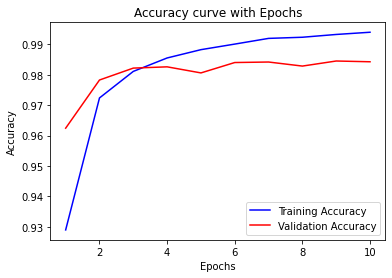

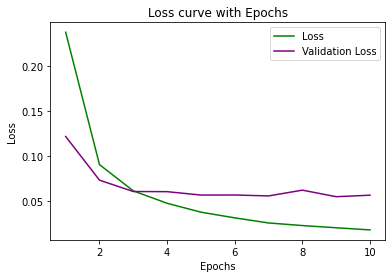

In [15]:
# Plotting and Visualising

l5acc = a.history["accuracy"]
l5val_acc = a.history["val_accuracy"]
l5lss = a.history["loss"]
l5val_lss = a.history["val_loss"]
epochs_list = [1,2,3,4,5,6,7,8,9,10]

plt.plot(epochs_list, l5acc, 'blue', label='Training Accuracy')
plt.plot(epochs_list, l5val_acc, 'red', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy curve with Epochs')
plt.legend()
plt.show()

#Loss Plot
plt.plot(epochs_list, l5lss, 'green', label="Loss")
plt.plot(epochs_list, l5val_lss, 'purple', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve with Epochs')
plt.legend()
plt.show()

In [16]:
lenet5.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0446 - accuracy: 0.9871


[0.044595468789339066, 0.9871000051498413]

Lenet-5 Testing Accuracy - 98.7%

In [17]:
y_pred_lenet5 = lenet5.predict(x_test)
y_pred_lenet5

array([[2.3113571e-09, 1.7011837e-08, 2.1309685e-08, ..., 9.9999833e-01,
        1.2623258e-08, 1.2945331e-06],
       [2.6489490e-06, 8.8281762e-05, 9.9990571e-01, ..., 5.7414778e-10,
        1.1168388e-06, 6.5689537e-10],
       [6.0849345e-08, 9.9998438e-01, 5.2189165e-08, ..., 1.3127226e-05,
        6.8898009e-07, 9.3992825e-10],
       ...,
       [2.6523663e-09, 2.4237330e-09, 4.2743690e-07, ..., 8.4316065e-07,
        2.6047226e-06, 7.1104009e-06],
       [1.5479894e-07, 1.8772552e-09, 5.9039146e-10, ..., 1.0015051e-08,
        5.1581002e-05, 9.7580298e-08],
       [7.8148804e-07, 1.3385465e-09, 5.4947307e-08, ..., 3.5214009e-11,
        4.7770038e-07, 1.6210322e-09]], dtype=float32)

Applying both models on cifar10 dataset

In [32]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [34]:
cifar10model = tf.keras.Sequential()
cifar10model.add(tf.keras.Input(shape=(32,32,3)))
cifar10model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding="valid"))
cifar10model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
cifar10model.add(tf.keras.layers.Flatten(name="Input"))
cifar10model.add(tf.keras.layers.Dense(100,activation="relu", name="HiddenLayer1"))
cifar10model.add(tf.keras.layers.Dense(10,activation="softmax", name="Output"))
cifar10model.summary()
cifar10model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
cifar10plot = cifar10model.fit(x_train,y_train,batch_size=25,epochs=15, validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 Input (Flatten)             (None, 7200)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               720100    
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 722,006
Trainable params: 722,006
Non-trainable params: 0
________________________________________________

Training Accuracy = 73.48%

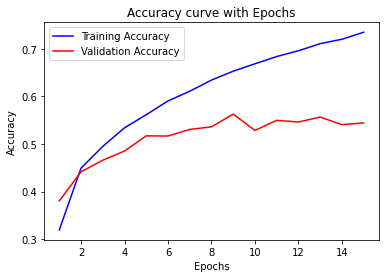

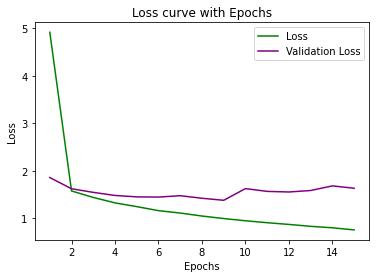

In [36]:
# Plotting and Visualising

cifar10acc = cifar10plot.history["accuracy"]
cifar10val_acc = cifar10plot.history["val_accuracy"]
cifar10lss = cifar10plot.history["loss"]
cifar10val_lss = cifar10plot.history["val_loss"]
epochs_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

plt.plot(epochs_list, cifar10acc, 'blue', label='Training Accuracy')
plt.plot(epochs_list, cifar10val_acc, 'red', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy curve with Epochs')
plt.legend()
plt.show()

#Loss Plot
plt.plot(epochs_list, cifar10lss, 'green', label="Loss")
plt.plot(epochs_list, cifar10val_lss, 'purple', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve with Epochs')
plt.legend()
plt.show()

In [37]:
cifar10model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6472 - accuracy: 0.5408


[1.6471798419952393, 0.5407999753952026]

Testing Accuracy = 54.08%

In [38]:
y_pred_cifar10 = cifar10model.predict(x_test)
y_pred_cifar10

array([[2.2130237e-04, 2.3866865e-04, 1.9053711e-06, ..., 1.0278759e-07,
        1.5760481e-04, 8.1760305e-07],
       [4.7220397e-03, 1.6155913e-02, 6.4431491e-09, ..., 5.8567547e-11,
        9.7886068e-01, 2.6122073e-04],
       [7.6927519e-01, 1.2549697e-02, 3.0323949e-02, ..., 8.3729744e-02,
        8.0878399e-02, 1.5318447e-02],
       ...,
       [1.1354546e-05, 1.6716098e-05, 1.6553296e-01, ..., 1.1803312e-01,
        5.5671939e-05, 2.1662316e-05],
       [4.9015526e-02, 8.1241578e-03, 4.6013158e-02, ..., 1.8128265e-02,
        2.8996404e-02, 5.0991420e-03],
       [1.5057267e-05, 2.7282402e-07, 1.7705288e-03, ..., 9.8410058e-01,
        5.4744345e-07, 1.2548949e-06]], dtype=float32)

Applying LeNet-5 architecture on cifar10

In [24]:
lenet5cifar10model = tf.keras.Sequential()
lenet5cifar10model.add(tf.keras.Input(shape=(32,32,3)))
lenet5cifar10model.add(tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', padding="same", name="ConvolutionalLayer1"))
lenet5cifar10model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, name="AveragePooling1"))
lenet5cifar10model.add(tf.keras.layers.Conv2D(16,kernel_size=(5, 5), activation='tanh', name="ConvolutionalLayer2"))
lenet5cifar10model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, name="AveragePooling2"))
lenet5cifar10model.add(tf.keras.layers.Flatten(name="Input"))
lenet5cifar10model.add(tf.keras.layers.Dense(units=120, activation='tanh', name="HiddenLayer1"))
lenet5cifar10model.add(tf.keras.layers.Dense(units=84, activation='tanh', name="HiddenLayer2"))
lenet5cifar10model.add(tf.keras.layers.Dense(units=10, activation = 'softmax', name="Output"))
lenet5cifar10model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionalLayer1 (Conv2D  (None, 32, 32, 6)        456       
 )                                                               
                                                                 
 AveragePooling1 (AveragePoo  (None, 16, 16, 6)        0         
 ling2D)                                                         
                                                                 
 ConvolutionalLayer2 (Conv2D  (None, 12, 12, 16)       2416      
 )                                                               
                                                                 
 AveragePooling2 (AveragePoo  (None, 6, 6, 16)         0         
 ling2D)                                                         
                                                                 
 Input (Flatten)             (None, 576)              

In [43]:
lenet5cifar10model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
c = lenet5cifar10model.fit(x_train,y_train,batch_size=25,epochs=5, validation_split=0.2)

Epoch 1/5
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4722 - accuracy: 0.8324 - val_loss: 2.2552 - val_accuracy: 0.4947
Epoch 2/5
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4161 - accuracy: 0.8536 - val_loss: 2.2610 - val_accuracy: 0.4942
Epoch 3/5
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4637 - accuracy: 0.8360 - val_loss: 2.2584 - val_accuracy: 0.4964
Epoch 4/5
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4304 - accuracy: 0.8486 - val_loss: 2.2582 - val_accuracy: 0.4951
Epoch 5/5
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4354 - accuracy: 0.8477 - val_loss: 2.2517 - val_accuracy: 0.4962


Training Accuracy = 84.77%

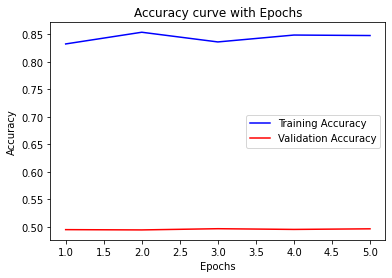

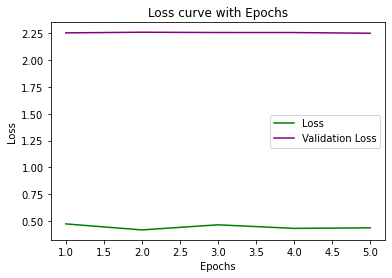

In [44]:
# Plotting and Visualising

lenet5cifar10acc = c.history["accuracy"]
lenet5cifar10val_acc = c.history["val_accuracy"]
lenet5cifar10lss = c.history["loss"]
lenet5cifar10val_lss = c.history["val_loss"]
epochs_list = [1,2,3,4,5]

#Accuracy Plot
plt.plot(epochs_list, lenet5cifar10acc, 'blue', label='Training Accuracy')
plt.plot(epochs_list, lenet5cifar10val_acc, 'red', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy curve with Epochs')
plt.legend()
plt.show()

#Loss PLot
plt.plot(epochs_list, lenet5cifar10lss, 'green', label="Loss")
plt.plot(epochs_list, lenet5cifar10val_lss, 'purple', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve with Epochs')
plt.legend()
plt.show()

This is the case of Overfitting

In [45]:
lenet5cifar10model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.2784 - accuracy: 0.4975


[2.2783970832824707, 0.4975000023841858]

Testing Accuracy = 49.75%

In [28]:
y_pred_lenet5cifar10 = lenet5cifar10model.predict(x_test)
y_pred_lenet5cifar10

array([[7.15701431e-02, 1.16217406e-02, 4.10088226e-02, ...,
        1.12924865e-02, 4.78742905e-02, 2.15993933e-02],
       [2.72238068e-02, 4.44986790e-01, 2.61230336e-04, ...,
        1.61828375e-05, 4.71624613e-01, 5.54063693e-02],
       [1.27683282e-02, 6.63994849e-02, 7.52096646e-04, ...,
        7.13918198e-05, 8.80225599e-01, 3.79514284e-02],
       ...,
       [1.16090970e-02, 2.24852556e-04, 1.19801395e-01, ...,
        3.64751406e-02, 1.06112203e-02, 1.78455212e-03],
       [8.76838043e-02, 1.84335023e-01, 5.32812998e-02, ...,
        5.85710742e-02, 1.19543239e-01, 2.94141900e-02],
       [1.29867985e-03, 4.38923526e-05, 6.70546712e-03, ...,
        3.65378112e-01, 7.35838476e-05, 3.94357776e-04]], dtype=float32)

**On MNIST**

Lenet-5 gives better test accuracy (98.7%)

CNN model gives better training accuracy (99.8%)

**On CIFAR-10 dataset**

CNN Model gives better test accuracy (54.08%)

Lenet-5 Architecture gives better training accuracy (84.77%)
